# Deep Learning With PyTorch 15 - Transfer Learning

A model developed for a first task is used to work on a second text. 
Ex: take a model used to classify birds and cats and re-purpose the model to classify bees and dogs. 

Take a pre-trained model and modify the last few layers to classify different things.

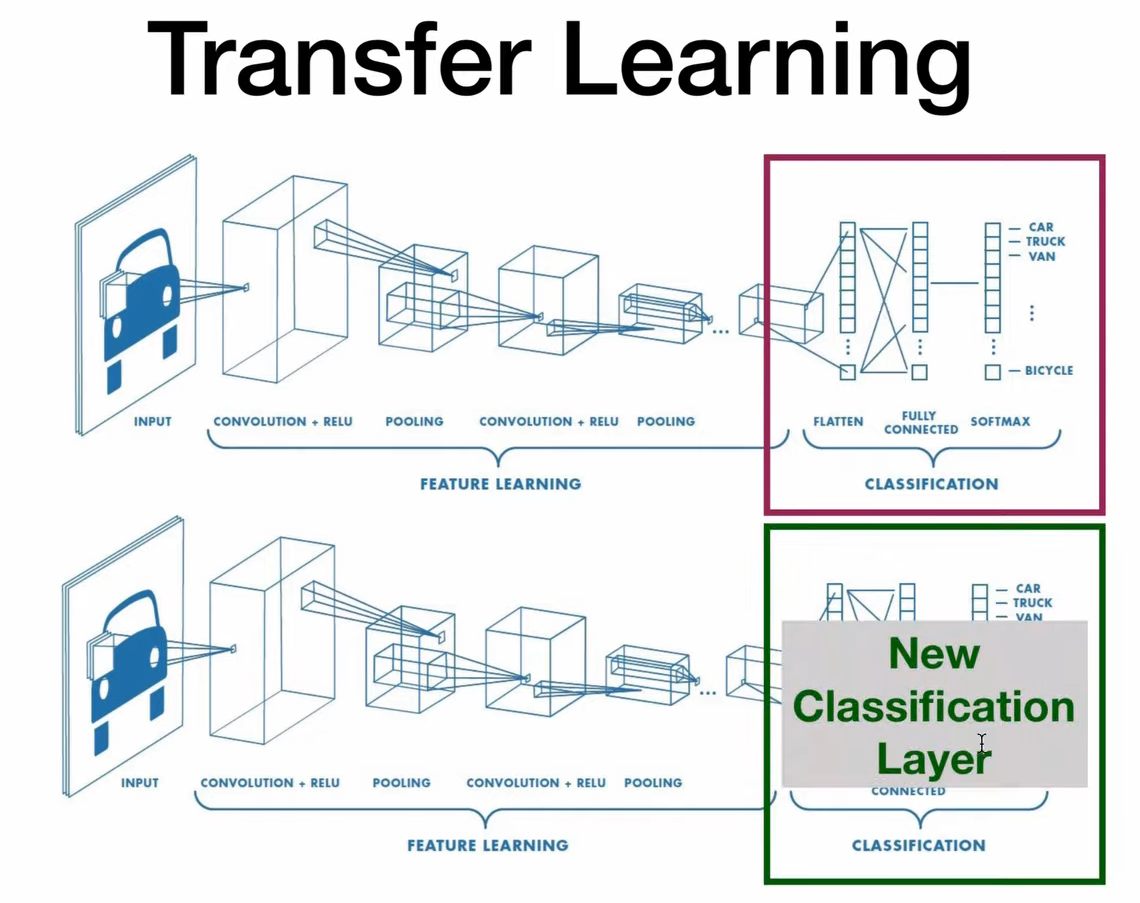

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy



In [5]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
}

In [7]:
data_dir = 'data/'
sets = ['train', 'val']
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/train'

Load a pretrained dataset

In [4]:
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
num_ftrs = model.fc.in_features # number of features in last layer

# create a new layer and put it on the last layer
model.fc = nn.Linear(num_ftrs, 2)
model.to('cpu')
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)


Scheduler

In [ ]:
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
# every 7 epochs, our learning rate is multiplied by 0.1

model = train_model(model, criterion, optimizer, scheduler, num_epochs=20)